In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import data
from skimage.transform import rotate

In [2]:
#creates a rainbow given
#color array
#thickness of stripes (array)
#length of stripes
#angle of orientation in degrees
#location = (x,y)
#outputFile = whiteblankimage

def createRainbow(Color_Array, thicc, length, angle, start, outputFile):
    length = 500
    thicc = thicc
    endlocations = []
    currentLocation = start
    endPoint = [int(currentLocation[0] + length*np.cos(angle)), int(currentLocation[1] + length*np.sin(angle))]
    endlocations.append(endPoint)
    for i in range(len(Color_Array)):
        cv2.line(outputFile, pt1 = (currentLocation[0], currentLocation[1]), pt2 = (endPoint[0], endPoint[1]), color = Color_Array[i], thickness = thicc)
        currentLocation[1] = currentLocation[1] + thicc
        endPoint = [int(currentLocation[0] + length*np.cos(angle)), int(currentLocation[1] + length*np.sin(angle))]
        endlocations.append(endPoint)
    return endlocations

In [3]:
# configurations for sample lines (non-quantum)

size = 500
colors = 7

def create_color():
    return [random.random()*255,random.random()*255,random.random()*255]

#quantum_err = "111111111111111111111111111111111111111111111111111111111111111111111111111111111111" # 20%
# quantum_err = "111111111111110111111111110111111111110111111110110111111110110111111110110111110100" # 15
# quantum_err = "111111111011110111011011011111001111011011001111011011001011110100110010110100110010" # 20%
# quantum_err = "111111111111110111100011100001011011100000011011100000000011100010000011100000010011" # 40%
def create_color_qc(i):
    counter_err = 12*i
    return [int(quantum_err[counter_err:counter_err+4])/1111*255,
            int(quantum_err[counter_err+4:counter_err+8])/1111*255,
            int(quantum_err[counter_err+8:counter_err+12])/1111*255]

# def get_qc_0_or_1(count):
    # return round(random.random(),0)
    # counter_err += 1
    # return (quantum_err[counter_err-1])

def get_0_or_1():
    return round(random.random(),0)

colorarr = []
for i in range(colors):
    colorarr.append(create_color_qc(i))
    
length = 0
thickness = int(size/colors)
angle = 0
start = [0,int(thickness/2)]

In [4]:
# actually build rainbow of colors

def createPlane():
    whiteblankimage = 255*np.ones(shape=[size, size, 3], dtype = np.uint8)
    return whiteblankimage

rainbow = createPlane()

print(colorarr)

createRainbow(colorarr, thickness, length, angle, start, rainbow)

[[500, 25],
 [500, 75],
 [500, 125],
 [500, 175],
 [500, 225],
 [500, 275],
 [500, 325],
 [500, 375],
 [500, 425],
 [500, 475],
 [500, 525]]

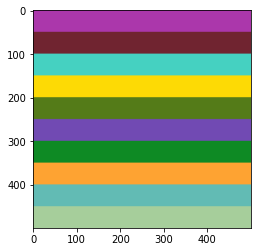

In [5]:
# print rainbow

plt.imshow(rainbow)

In [6]:
# helper functions with data

def build_str_of_q_out():
    str1 = ""
    for i in range(3):
        str1 += str(int(get_0_or_1()))
    return str1
    
walk_arr = ["000",
"010",
"011",
"011",
"001",
"000",
"000",
"001",
"001",
"011",
"111",
"111",
"101",
"111",
"110",
"111",
"011",
"001",
"101",
"001",
"001",
"011",
"011",
"011",
"111",
"101",
"111",
"011",
"001",
"101",
"111",
"101",
"101",
"101",
"001",
"000",
"010",
"000",
"010",
"000",
"001",
"101",
"111",
"110",
"110",
"110",
"010",
"011",
"001",
"001",
"101",
"111",
"111",
"111",
"111",
"101",
"100",
"101",
"100",
"101",
"111",
"110",
"110",
"100",
"000",
"000",
"010",
"010",
"000",
"000",
"100",
"000",
"010",
"110",
"110",
"010",
"000",
"001",
"000",
"001",
"101",
"100",
"000",
"100",
"110",
"100",
"101",
"001",
"011",
"001",
"001",
"011",
"001",
"101",
"100",
"100",
"000",
"001",
"000",
"100",
"110"]
    
def get_str_from_qc(i):
    return walk_arr[i]
    
def get_random_walk(i):
    # dict = {"001": 0,
    #         "110": 20, 
    #         "011": 40,
    #         "111": 60,
    #         "101": 90,
    #         "100": 120,
    #         "010": 200,
    #         "000": 300,
    #        }
    dict = {"001": 0,
            "110": 0, 
            "011": 90,
            "111": 90,
            "101": 180,
            "100": 180,
            "010": 270,
            "000": 270,
           }
    return dict[walk_arr[i]]


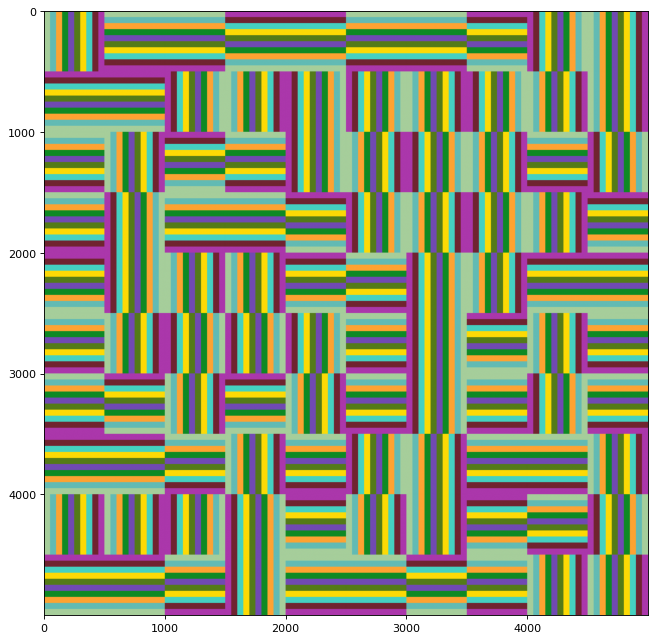

In [8]:
# Assemble images together with random walk data

scale = 8

columns = []
for j in range(scale):
    images = []
    for i in range(scale):
        image = rainbow
        image = rotate(image, get_random_walk(i*j+i), resize=False)
        #image = image[150:350,150:350]
        images.append(image)

    columns.append(np.concatenate(images))
merge = np.hstack(columns)

plt.figure(figsize=(10, 10), dpi=80)
plt.imsave("merge.jpg", merge)
plt.imshow(merge)